In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_path = '../generated/'
cookies_recipes = pd.read_json(data_path + 'clean_cookies_recipes.json')
kaggle_recipes = pd.read_json(data_path + 'clean_kaggle_recipes.json')

In [8]:
cookies_recipes = cookies_recipes[['id', 'title', 'recipe']]
kaggle_recipes = kaggle_recipes[['id', 'recipe']]

In [9]:
all_recipes = pd.concat([cookies_recipes, kaggle_recipes], sort=False)

In [10]:
df_recipe = all_recipes['recipe'].apply(pd.Series).stack().to_frame().reset_index()
df_recipe = df_recipe[0].to_frame()

In [11]:
df_recipe = df_recipe.rename({0:'ingredient'}, axis=1)
df_recipe.head(5)

,ingredient
0,butter
1,stalks celery
2,carrot
3,onion
4,green bell pepper


In [12]:
len(df_recipe['ingredient'].unique())

29998

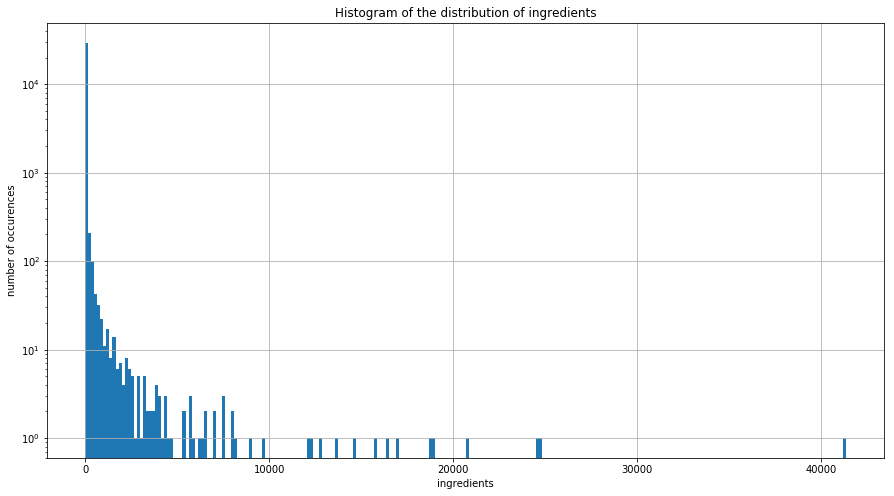

In [13]:
count_table = df_recipe['ingredient'].value_counts().to_frame().rename({'ingredient':'count'}, axis = 1)
ax = count_table['count'].hist(bins=250, figsize=(15, 8))
ax.set_yscale('log')
ax.set_title('Histogram of the distribution of ingredients')
ax.set_ylabel('number of occurences')
ax.set_xlabel('ingredients')
plt.show()

In [14]:
without_junk = count_table[count_table['count'] > 4]
#without_junk.to_json("generated/ingredients_count.json")

In [15]:
print("We keep "+ str(100*((without_junk['count'].sum()) / count_table.sum())[0])[:5]+\
      "% of the data if we discard ingredients that appear in less than 5 recipes.")
     

We keep 96.48% of the data if we discard ingredients that appear in less than 5 recipes.


In [16]:
count_table.head(10)

,count
salt,41346
onion,24702
butter,24508
water,20815
egg,18855
sugar,18752
black pepper,16961
olive oil,16467
pepper,15802
garlic,14584


In [17]:
#count_table[count_table.index.str.contains('sil')]